<a href="https://colab.research.google.com/github/shivanishridhar/Data-Science-Engineering-Methods/blob/main/002770631_Shivani_Gole_Assignment02_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Assignment 02
#Name : Shivani Shridhar Gole
#NUID : 002770631
#Linear and Logistic Regression

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Linear Regression

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 2.1 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
from sklearn import datasets

In [ ]:
bostonhousing = pd.read_excel('/content/boston housing.xls')
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [ ]:
# Data Preprocessing
bostonhousing.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


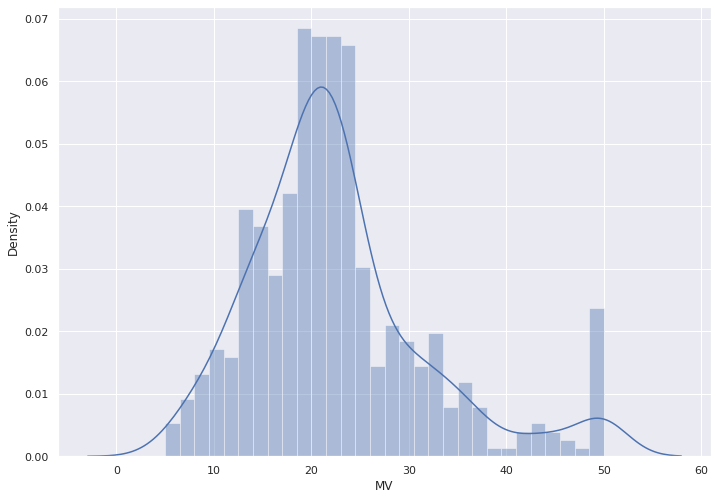

In [ ]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.distplot(bostonhousing['MV'],bins =30)
plt.show()

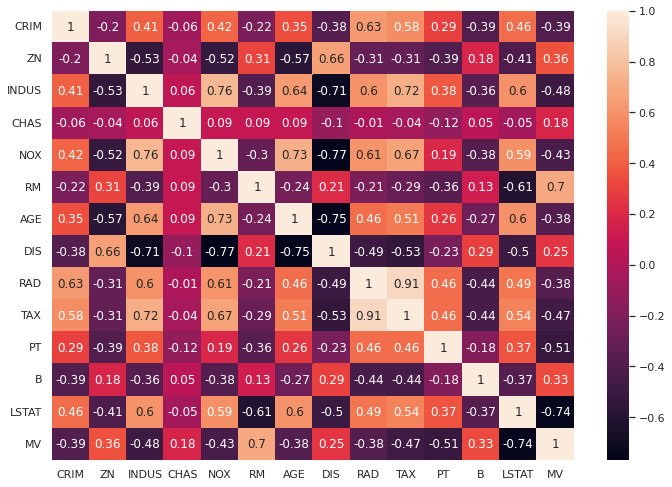

In [ ]:
correlation_plot = bostonhousing.corr().round(2)
sb.heatmap(data=correlation_plot, annot=True)

In [ ]:
X = pd.DataFrame(np.c_[bostonhousing['LSTAT'], bostonhousing['RM']], columns = ['LSTAT','RM'])
Y = bostonhousing['MV']

In [ ]:
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [ ]:
Y

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: MV, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.6300745175364755

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([37.38999372, 29.79290687, 25.8675519 ,  0.3137084 , 33.3138555 ,
        7.97136091, 30.70663807, 27.83076755, 26.26693162, 21.97871606,
       32.33149274, 23.21791463, 22.99328937, 30.97465394, 27.19747741,
       20.71715332, -0.67525022, 18.01248597, 12.31081071, 21.90615851,
        4.82262164, 24.00423136, 37.702793  , 24.59521874, 29.63557214,
       12.53962844, 27.07081322, 22.44485958, 27.64895341, 28.99223621,
       11.38689543, 10.3911972 , 18.02726653, 24.65916625, 26.32593688,
       22.97547755, 26.32610475, 12.30204526, 37.03909579, 33.55199032,
       20.27794929,  1.09051196, 27.65786804, 16.5278904 , 27.49181737,
       29.91634329, -3.04746188, 17.23365806, 20.71953987, 13.74285709,
       20.74965761, 21.4801246 , 25.17310261, 16.12470339, 17.61200441,
       27.89189124, 36.0647484 , 19.6786285 , 28.88714633, 20.45602496,
       20.1185843 , 23.11316765, 16.53445116, 31.30827913, 22.6216272 ,
       13.10525004, 23.36377871, 25.90474337, 23.00735616, 21.62

In [ ]:
# model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129340786542
MSE is 31.777227204756517
R2 score is 0.6300745175364755


The model performance for testing set
--------------------------------------
RMSE is 5.137400797739368
MSE is 26.3928869566131
R2 score is 0.6628996906404767


In [ ]:
model = linear_model.LinearRegression().fit(X_test, Y_pred)
model.score(X_test,Y_test)

0.6628996906404767

In [ ]:
#Logistic Regression

In [ ]:
loan = pd.read_excel('/content/loan.xlsx')
loan.head()


,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [ ]:
print(loan['Sex'].unique())
print(loan['Res_status'].unique())
print(loan['Telephone'].unique())
print(loan['Occupation'].unique())
print(loan['Job_status'].unique())
print(loan['Liab_ref'].unique())
print(loan['Acc_ref'].unique())
print(loan['Decision'].unique())

['M' 'F']
['owner' 'rent']
['given' 'not_given']
['unemploye' 'labourer' 'creative_' 'driver' 'professio' 'manager'
 'guard_etc' 'executive' 'office_st' 'productio' 'semi_pro' 'sales']
['unemploye' 'governmen' 'private_s' 'self_empl' 'retired' 'student'
 'military']
['f' 't']
['given' 'oth_inst_']
['reject' 'accept']


In [ ]:
x = loan.iloc[:,loan.columns != 'Decision']
y = loan['Decision']

In [ ]:
input_numerical = x.select_dtypes(include='number')
input_numerical

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,50.750000,0.585,0,0,145,0
1,19.670000,10.000,0,0,140,0
2,52.830002,15.000,5,14,0,2200
3,22.670000,2.540,2,0,0,0
4,29.250000,13.000,0,0,228,0
...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200
425,22.250000,1.250,3,0,280,0
426,23.330000,1.500,1,0,422,200
427,21.000000,4.790,2,1,80,300


In [ ]:
input_categorical = x.select_dtypes(include='object')
input_categorical.columns

Index(['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status',
       'Liab_ref', 'Acc_ref'],
      dtype='object')

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = input_categorical.apply(le.fit_transform)
X.head()

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref
0,1,0,0,11,6,0,0
1,1,1,1,4,0,1,0
2,0,0,0,0,2,0,0
3,1,1,1,0,0,0,0
4,1,0,0,1,0,0,0


In [ ]:
new_input = pd.concat(objs= [X,input_numerical],axis='columns')
new_input.head()

,Sex,Res_status,Telephone,Occupation,Job_status,Liab_ref,Acc_ref,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,1,0,0,11,6,0,0,50.750000,0.585,0,0,145,0
1,1,1,1,4,0,1,0,19.670000,10.000,0,0,140,0
2,0,0,0,0,2,0,0,52.830002,15.000,5,14,0,2200
3,1,1,1,0,0,0,0,22.670000,2.540,2,0,0,0
4,1,0,0,1,0,0,0,29.250000,13.000,0,0,228,0


In [ ]:
#OneHotEncoder
enc = preprocessing.OneHotEncoder()

#fit
enc.fit(input_categorical)

# transform
onehotlabel = enc.transform(input_categorical).toarray()
onehotlabel.shape

(429, 29)

In [ ]:
onehotlabel

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.]])

In [ ]:
loan.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [ ]:
loan = loan.drop(['Sex'],axis=1)
loan.shape

(429, 13)

In [ ]:
loan =loan.drop(['Telephone'],axis=1)
loan.shape

(429, 12)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(onehotlabel,y, random_state=0)

In [ ]:
model = LogisticRegression(solver='lbfgs',random_state=0)

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
p_value = model.predict(onehotlabel)
p_value

array(['reject', 'reject', 'accept', 'reject', 'reject', 'reject',
       'accept', 'reject', 'reject', 'accept', 'reject', 'reject',
       'reject', 'reject', 'accept', 'reject', 'reject', 'accept',
       'reject', 'accept', 'accept', 'reject', 'accept', 'reject',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'accept', 'accept', 'reject', 'accept', 'accept',
       'accept', 'accept', 'reject', 'accept', 'reject', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'reject',
       'reject', 'accept', 'reject', 'reject', 'accept', 'accept',
       'reject', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'accept', 'reject', 'accept', 'reject', 'accept',
       'accept', 'reject', 'reject', 'reject', 'accept', 'reject',
       'reject', 'reject', 'reject', 'reject', 'accept', 'accept',
       'accept', 'reject', 'reject', 'reject', 'reject', 'reject',
       'reject', 'accept', 'accept', 'accept', 'reject', 'acce

In [ ]:
corr = loan.corr()
corr

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
Age,1.000000,0.217342,0.426890,0.208736,-0.072254,0.101819
Time_at_address,0.217342,1.000000,0.278849,0.202083,-0.267470,0.072235
Time_employed,0.426890,0.278849,1.000000,0.291542,-0.110933,0.112719
Time_bank,0.208736,0.202083,0.291542,1.000000,-0.111761,0.153435
Home_Expn,-0.072254,-0.267470,-0.110933,-0.111761,1.000000,0.080366
Balance,0.101819,0.072235,0.112719,0.153435,0.080366,1.000000


In [ ]:
r_sq = model.score(onehotlabel, y)
r_sq

0.6643356643356644

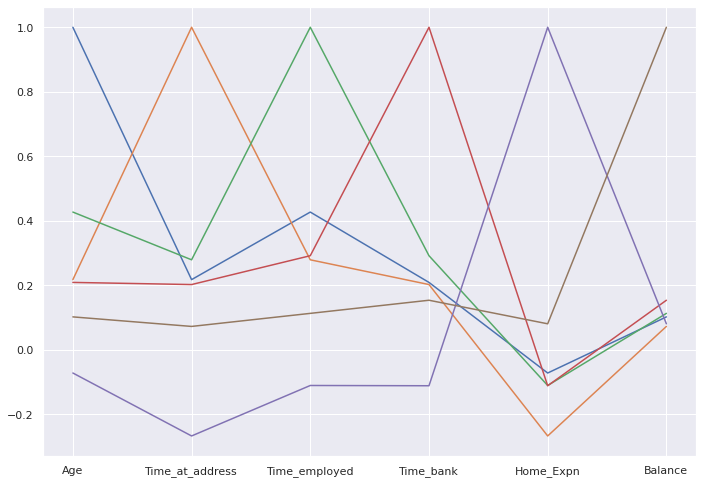

In [ ]:
plt.plot(corr)


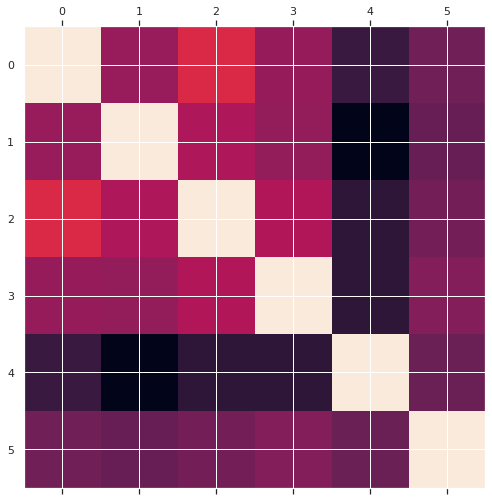

In [ ]:
plt.matshow(corr)
plt.show()

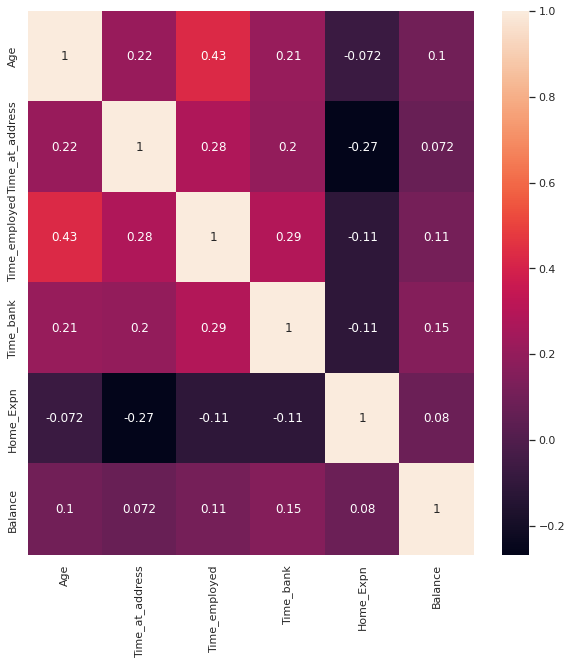

In [ ]:
figure, axes = plt.subplots(figsize=(10,10))
sb.heatmap(corr,annot=True,ax=axes)